# Tutorial 2.1 Databases and SQL 

by Nadzeya Laurentsyeva @ nadzeya.laurentsyeva@econ.lmu.de

# 1. Introduction 

## Motivation

### Practice Python (pandas, numpy, functions, statsmodels)
* Working with data: downloading and merging datasets, data cleaning, summary statistics, basic regression analysis 

### Introduction to Databases and SQL 
* Wide-spread in research, public and private sectors
* Examples from research: PATSTAT, Orbis, PubMed, ...
* Examples from 'real life': a company's personnel records, records from a distribution system, records from a performance management system, ... 
* Practical when we need to filter and aggregate the original (big) dataset before analysing it (think of merging two 10GB datasets in Stata/R/Python, will it work?). 

## Covered in this tutorial
**Tools** 
* Language: SQlite - relational database management system
* Using SQL in Python 
* Various commands for data analysis in Python

**Operations** 
* Creating a new relational database in SQLite, writing and updating data  
* Quering the database and retrieving data for further analysis
* Merging several datasets, basic summary statistics, regression analysis 

**Software requirements** 
* Python 3, [SQlite](https://www.sqlite.org/index.html) - not necessary to download, already included in Python standard library, [SQlite Browser](https://sqlitebrowser.org/) - optional, if you want to better visualize databases that you create (good for beginners, but rather useless in the long run)
* Packages in python: pandas, [sqlite3](https://docs.python.org/3/library/sqlite3.html), [gdown](https://pypi.org/project/gdown/) (optional, I used it to download files from Google drive; to install: run> pip install gdown from the command prompt or anaconda prompt)

**Data**
* Part of the GitHub Database, originally from https://ghtorrent.org/downloads.html 
* Part of the CEPII Gravity dataset used to estimate trade gravity equations http://www.cepii.fr/cepii/en/bdd_modele/presentation.asp?id=8
* You can download the raw data needed for this class [here](https://drive.google.com/open?id=1qE23_9H7tvb3tJHDjStWPKjbTcq9TLjs) (manually) or use the gdown package to download it directly (see below). 

**Problem Set** 
<div class="alert alert-block alert-info">
<b>Problem Set. </b> You will find a problem set in the end of this notebook. Its main goal is to give you an opportunity to practice data analysis in Python by working on a real task. I encourage you to work on the problem set in teams. In the end, please, submit your responses to the form below (one form per team is enough) by <b>Monday, October 25. </b> 
    
If you tried to solve a question, but could not manage, please, write 'Can't solve (you can also specify a problem)'. The responses are anonymous and non-mandatory, but your feedback is extremely helpful :)  I will spend the first 15 minutes of our class on October 26 to go through the problem set and your questions. Solutions will be available after that. 
   

</div>

**Form to submit answers to the Problem Set** 
*  https://forms.gle/6hTyYSuncACgwzar9

## Learning by doing
We will mainly learn about databases and SQL by working on a specific problem. The task is to estimate a gravity model (https://en.wikipedia.org/wiki/Gravity_model_of_trade). However, instead of trade flows we will look at the collaborations of programmers on GitHub. 

GitHub is a platform for software development that was launched in 2007 and hosts a collaborative version control system. As of now, there are over 40 million registered users on GitHub (coming from all over the world) and almost 200 million repositories (mostly software projects). This is the largest host of source code in the world. 
[Github Wikipedia](https://en.wikipedia.org/wiki/GitHub), [What is Github](https://www.howtogeek.com/180167/htg-explains-what-is-github-and-what-do-geeks-use-it-for/)

Some vocabulary: 
* User - registered user on the Github Platform (think of a programmer who uses Github for his/her software projects).
* Repository - is usually used to organize a single project. Repositories can contain folders and files, codes, images, videos, spreadsheets, and data sets – anything a project needs.
* Repository owner - a Github user who started a given repository (project). 
* Commit - any source code modification by a Github user. 

We have access to some Github data: 
* Table 'Commits': includes all commits realized in October 2018 by a given user to a given repository. This table only has committer and repository IDs. 
* Table 'Users': information on users who had at least 1 commit in October 2018. This table, among other information, contains self-reported user location.
* Table 'Projects': information on repositories that had at least 1 commit in October 2018. This table contains the ID of the repository's owner, which can be linked back to the 'Users' table. 

How can we measure international collaborations on GitHub? 

One way that we will use here: define a collaboration international if a user from one country contributes to a repository (=project) owned by a user from another country. Our main outcome variable will be the number of contributions by commiters from one country to projects owned by users from another country. In this way, we make our data comparable to bilateral trade flow data. 

**Workflow** 

For our analysis, we need to merge the three tables together and to aggregate them in order to obtain the dataset with four columns columns: 
* (1) Country of commiters; (2) Country of project owners; (3) Country pair identifyier (treating DE-US and US-DE as the same country pair); (4) Number of collaborations

We will then merge the resulting dataset to the CEPII dataset that contains necessary variables for estimating the gravity model (e.g. GDP, population, distance, common language, common border etc.). 

How will we use SQLite and SQL? 
* We will upload commits, users, and projects tables in a sqlite3 database using Python
* Investigate the data with simple filtering and aggregation queries
* Use more complex queries to merge and aggregate the GitHub tables and prepare the dataset for the regression analysis

If you are already fluent in SQL, just go ahead and try to solve the problem - all the datasets are available. The solutions to the tutorial will be posted right after the lecture on October 22.  
***

# 2. Databases

## Definition and basic facts

Think of a database as of a container used to organize and structure data. A table within a database is then a structured list (dictionary) of data elements. 

In this class, we will work with relational (= table-oriented) databases. 

Building blocks: 
* Entity =record or observation in the data, corresponds to a row in the table 
* Attribute =a characteristics of an entity, corresponds to a column 
* Relationship =associations among entities (often coming from different tables)
    * One-to-many
    * Many-to-many
    * One-to-one 
    
Basic operations:
* Classical set operations (union, intersection and difference)
* Selection (selection of a subset of records according to certain filter criteria for the attribute values)
* Projection (selecting a subset of attributes / columns of the table)
* Join: special conjunction of multiple tables as a combination of the Cartesian product with selection and projection.

These basic operations, as well as operations for creation, modification and deletion of table schemas, operations for controlling transactions and user management are performed by means of database languages, with SQL being a well established standard for such languages.

Popular relational database management systems https://db-engines.com/en/ranking/relational+dbms
* Oracle
* MySQL
* Microsoft SQL Server 
* Postgre SQL
* IBM Db2
* **SQLite**
* ... 
* **Google Big Query** 

### Example of an ER (entity relationship) Diagram for a  relational database: GitHub data from GHtorrent project
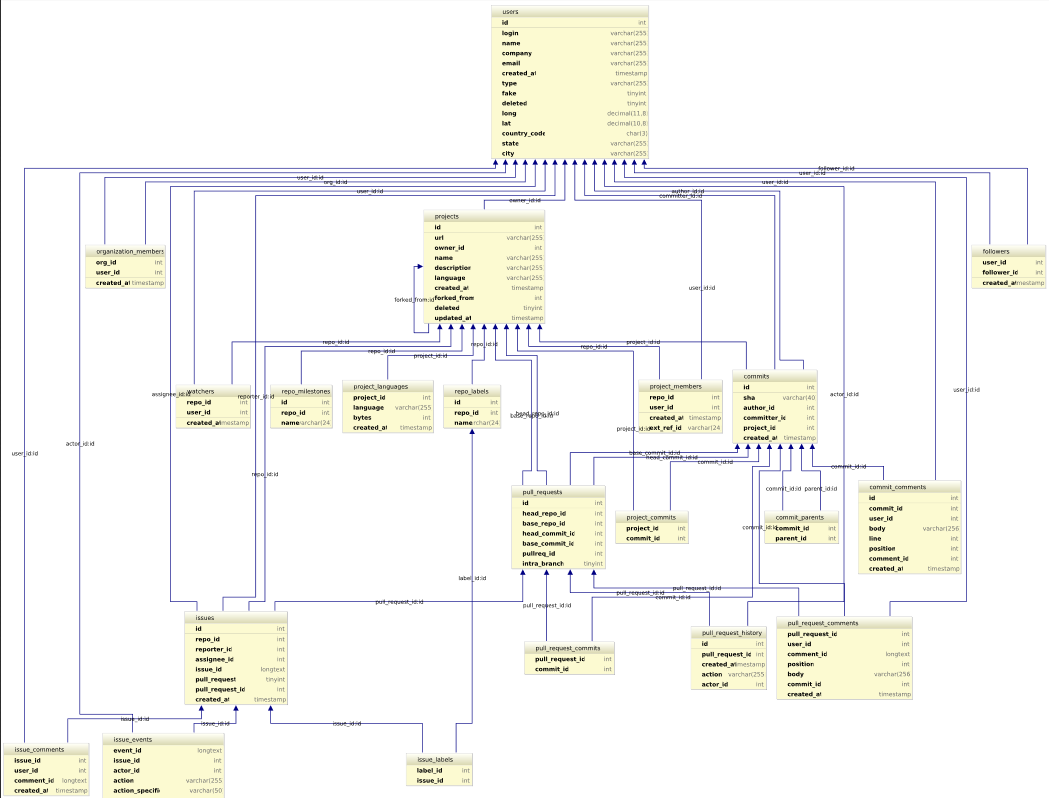
Source: https://ghtorrent.org/files/schema.pdf

# 3. SQL

SQL _sequel_ - Structured Query Language - a standard computer language for relational database management and data manupulation. 

Basic functions: 
* Read and retrieve data (query)
* Write and update data (insert, modify)

What SQL can't do: write complete applications. 

NB: SQL syntax ("dialect") might slighlty differ depending on the database management system in use (e.g. some commands that work well with SQLite DBs do not work with MySQL DBs). 


## 4.1 Creating a database and uploading the data (SQLite)

**Import the packages** 

In [102]:
# if needed: set the path to your folder, otherwise data are stored in the same folder as the notebook
# path = "C:/Users/nadzeya/Documents/teaching/Data_science_2021_ss/tutorial2" 
# os.chdir(path) #establish the path to your folder

# import the necessary packages
# if a package is missing, from Anaconda prompt: pip install package_name 
import os, sys, time
import pandas as pd
import numpy as np
import sqlite3, csv
import gdown

**Download the datasets to your folder**

In [103]:
# You can also donwload the files manually using the links below 
# https://drive.google.com/uc?id=1mBw4rxyRHLHiLbrCmAkEuQDHINTa2vh9 #users
# https://drive.google.com/uc?id=1kLrnDeu63axie8iQJhJhMnuEdSeYVAfB #projects
# https://drive.google.com/uc?id=1sLdw4EI-M5Mo_pXsQZj9261PzrOCiF28 #commits
# https://drive.google.com/uc?id=12AgIyALme_MwTuQ-RLFc_6GoDEMSRf0w #cepii gravdata

url = ["1mBw4rxyRHLHiLbrCmAkEuQDHINTa2vh9", "1kLrnDeu63axie8iQJhJhMnuEdSeYVAfB", 
       "1sLdw4EI-M5Mo_pXsQZj9261PzrOCiF28", "12AgIyALme_MwTuQ-RLFc_6GoDEMSRf0w"]
output = ["users.csv", "projects.csv", "commits.csv", "gravdata.csv"]       
for i in range(4):    
    data = "https://drive.google.com/uc?id="+url[i]
    gdown.download(data, output[i], quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1mBw4rxyRHLHiLbrCmAkEuQDHINTa2vh9
To: C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\SQL and bigquery\users.csv
100%|██████████| 22.0M/22.0M [00:01<00:00, 18.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kLrnDeu63axie8iQJhJhMnuEdSeYVAfB
To: C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\SQL and bigquery\projects.csv
100%|██████████| 223M/223M [00:12<00:00, 18.5MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1sLdw4EI-M5Mo_pXsQZj9261PzrOCiF28
To: C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\SQL and bigquery\commits.csv
100%|██████████| 137M/137M [00:07<00:00, 18.6MB/s] 
Downloading...
From: https://drive.google.com/uc?id=12AgIyALme_MwTuQ-RLFc_6GoDEMSRf0w
To: C:\Users\nadzeya\Documents\teaching\Data_science_2021_ws\SQL and bigquery\gravdata.csv
100%|██████████| 4.43M/4.43M [00:00<00:00, 12.6MB/s]


**Create the connection to the database (SQLite)**

In [104]:
conn = sqlite3.connect('github_DB.sqlite') #if there was no database with such name in your folder, a new one will be created 
cur = conn.cursor() # define cursor object to send commands to SQL, think of it as of a bridge between our database and notebook
print("Connection established", cur)

# if you have SQLite Browser installed, you can use it to see this new database, otherwise, just believe it is there :) 

Connection established <sqlite3.Cursor object at 0x0000028E4A6FA500>


We will now create structures for the tables "Users", "Projects", and "Commits", and then will fill the tables with data from csv files. 

Why do we do this? 
* We create a database where we can practice SQL commands :) 
* In some cases (in particular, if you have to filter and merge huge datasets), it might be more efficient to load them in a database and do preliminary filtering, cleaning, aggregating and merging with SQL rather than with R/Stata/Python

<img src="tutorial_data.png" style="height:500px">

In [105]:
# Structure for Users table (column names and types are predetermined in our csv file)
# Note that the data we are working with has fewer columns than the original GitHub table

cur.executescript('''
DROP TABLE IF EXISTS users;
CREATE TABLE users (
  id INTEGER NOT NULL PRIMARY KEY ,
  login VARCHAR(255) DEFAULT NULL,
  created_at TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP,
  long DECIMAL(11,8)  DEFAULT NULL ,
  lat DECIMAL(10,8)  DEFAULT NULL ,
  country_code VARCHAR(255) DEFAULT NULL ,
  city VARCHAR(255) DEFAULT NULL)
''')
print("Table created")

Table created


**Inserting data in a table**
(this inserts one row)

    INSERT INTO table_name ( column1_name, column2_name, ... , columnN_name ) 
    VALUES ( 'xys', 'abc', ..., '187 ' ); 

    INSERT OR REPLACE INTO table_name ( column1_name, column2_name, ... , columnN_name ) 
    VALUES ( 'xys', 'abc', ..., '187 ' ); 

**Loading a bulk of data from another datafile, in our case from a csv file**

In [114]:
# open the relevant datafile and convert it to a list (here) or a dictionary   
data = open('users.csv', 'rt', encoding="utf8", errors = "replace")  #rt stands for read a file

#we read the file as a csv and put it in the list format; comma is default delimiter
#if you have a very big file, you might want to partition it
#I skip the first row as it has column labels
dr = list(csv.reader(data))[1:] 

# see the first five records 
dr[0:5]

[['4017099',
  'rmilovic90',
  '2014-04-23 09:00:02 UTC',
  '19.82670021',
  '45.30390167',
  'rs',
  'Novi Sad'],
 ['4097577',
  'vojvod',
  '2013-01-01 08:00:27 UTC',
  '22.93530083',
  '40.64839935',
  'gr',
  'Salonica'],
 ['4125841',
  'coolharsh55',
  '2014-01-11 17:17:14 UTC',
  '-6.2603097',
  '53.3498053',
  'ie',
  'Dublin'],
 ['4243789',
  'SloRunner',
  '2014-06-05 12:58:39 UTC',
  '15.1722002',
  '45.80009842',
  'si',
  'Novo Mesto'],
 ['4309913',
  'carojasq',
  '2011-12-17 03:01:54 UTC',
  '-74.072092',
  '4.7109886',
  'co',
  'Bogotá']]

In [115]:
# command to insert a row of data from our csv file.
# '?' - wildcard, values will change with each row
script = '''INSERT OR REPLACE INTO users (id, login, created_at, long, lat, country_code, city) 
VALUES (?, ?, ?, ?,?,?, ?)'''

cur.executemany(script, dr)
conn.commit() # save the changes to the database 
print("Table imported")
# the same could be done via terminal or directly in the DB Browser for SQLite.

Table imported


To practice, we can also write a function to upload data to other tables. 

In [116]:
# write a function to upload other datasets 
# Note: data - csv table to import; labels - column names; table - table name in our database. 
def import_table(data, labels, table, encode):
    values = (("?, ")*(labels.count(",")+1))[:-2]
    script = "INSERT OR REPLACE INTO " + table + " (" + labels + ") " + "VALUES (" + values + ")"
    with open(data, 'rt', encoding = encode, errors = "replace") as ins:
        dr = list(csv.reader(ins))[1:]
        cur.executemany(script, dr)
        conn.commit()
    return print("Table ", table, " imported")

<div class="alert alert-block alert-info">
<b>Question:</b> What does the line (4) do?  
       
       values = (("?, ")*(labels.count(",")+1))[:-2]
       
</div>

In [122]:
# it will create the right number of question marks (there could be multiple ways of doing this though)
# here I take labels as one string, could be also done using lists 

labels = "id, login, created_at, long"
# we need to create four question marks 

print(("?, ")*(labels.count(",")+1))
print((("?, ")*(labels.count(",")+1))[:-2])

?, ?, ?, ?, 
?, ?, ?, ?


In [123]:
# rewrite users table using the above function 
cur.executescript('''DELETE FROM users''') # drops all observations

In [124]:
data = "users.csv"
labels = "id, login, created_at, long, lat, country_code, city"
encode = "utf8"
table = "users"
import_table(data, labels, table, encode)

Table  users  imported


**First query to check whether the uploaded data made sense** 

In [134]:
out = cur.execute('''
SELECT * FROM users LIMIT 5''')
cur.fetchall()

[(2,
  'jmettraux',
  '2008-03-22 00:37:42 UTC',
  132.4552927,
  34.3852029,
  'jp',
  'Hiroshima'),
 (5,
  'weppos',
  '2008-04-06 08:44:35 UTC',
  12.4963655,
  41.9027835,
  'it',
  'Rome'),
 (9,
  'ben-biddington',
  '2008-11-03 12:13:46 UTC',
  174.776236,
  -41.2864603,
  'nz',
  'Wellington'),
 (12, 'lbt', '2009-05-24 15:29:53 UTC', -3.435973, 55.378051, 'gb', ''),
 (14,
  'nanounanue',
  '2010-11-24 05:43:29 UTC',
  -87.6297982,
  41.8781136,
  'us',
  'Chicago')]

In [135]:
# Note that columns' names (heading of the table) is not stored in the result of the cur.execute(our script)
# Column names are stored separately in the first column of cur.description (these are query-specific)
for i in cur.description:
    print(i[0])

id
login
created_at
long
lat
country_code
city


**Use data frames to work with the results of queries** 
If you plan to continue using python to work with the retrieved data, it is convenient to use DataFrames. Otherwise, you can export the result of the query (e.g. to a csv file) and use in any other software (like R, Stata) you prefer. 

In [137]:
# we can also use pandas to get a nicer view of the queries' results
out = cur.execute('''
SELECT * FROM users LIMIT 5''')
# store result in a dataframe 
out = pd.DataFrame(list(out)) 
# assign column names to the dataframe
out.columns = [i[0] for i in cur.description] 
out

,id,login,created_at,long,lat,country_code,city
0,2,jmettraux,2008-03-22 00:37:42 UTC,132.455293,34.385203,jp,Hiroshima
1,5,weppos,2008-04-06 08:44:35 UTC,12.496365,41.902783,it,Rome
2,9,ben-biddington,2008-11-03 12:13:46 UTC,174.776236,-41.286460,nz,Wellington
3,12,lbt,2009-05-24 15:29:53 UTC,-3.435973,55.378051,gb,
4,14,nanounanue,2010-11-24 05:43:29 UTC,-87.629798,41.878114,us,Chicago


In [138]:
# Note: cur.description is query-specific
# Here we select only two columns from the users table
print(list(cur.execute('''
SELECT id, login FROM users LIMIT 5''')))
[i[0] for i in cur.description]

[(2, 'jmettraux'), (5, 'weppos'), (9, 'ben-biddington'), (12, 'lbt'), (14, 'nanounanue')]


['id', 'login']

As we will have many queries this lecture, let's write a very simple function to view/store the results  as a DataFrame

In [139]:
# represents the results of the query as a DataFrame
def view_query(script):
    out = pd.DataFrame(list(cur.execute(script))) # put in a dataframe 
    out.columns = [i[0] for i in cur.description] # assign column labels
    return out

In [140]:
# let's try out the function and obtain some basic summary statistics 
script = '''SELECT COUNT(*) as Number_Users, MIN(created_at) as Oldest_User, 
MAX(created_at) as Youngest_User FROM users'''
view_query(script)

,Number_Users,Oldest_User,Youngest_User
0,292380,2007-10-20 03:24:19 UTC,2019-04-22 17:44:51 UTC


Alternatively we can also use inbuilt wrapper in pandas. It is up to you what to use. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html

In [142]:
script = '''SELECT COUNT(*) as Number_Users, MIN(created_at) as Oldest_User, 
MAX(created_at) as Youngest_User FROM users'''
pd.read_sql(script, conn, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)

,Number_Users,Oldest_User,Youngest_User
0,292380,2007-10-20 03:24:19 UTC,2019-04-22 17:44:51 UTC


We repeat now the same with projects and commits tables

In [143]:
# projects table
# note that it will take some time to load, in the output window you will need to see <Table is imported>
cur.executescript('''
DROP TABLE IF EXISTS projects;
CREATE TABLE projects (
  id INTEGER NOT NULL PRIMARY KEY,
  owner_id INTEGER DEFAULT NULL,
  name VARCHAR(255) DEFAULT NULL,
  language VARCHAR(255) DEFAULT NULL,
  created_at timestamp NOT NULL DEFAULT CURRENT_TIMESTAMP,
  forked_from INTEGER DEFAULT NULL,
FOREIGN KEY (owner_id) REFERENCES users (id), 
FOREIGN KEY (forked_from) REFERENCES projects (id)
) 
''')
data = "projects.csv"
labels = "id, owner_id, name, language, created_at, forked_from"
encode = "utf8"
table = "projects"
import_table(data, labels, table, encode)

#foreign keys show dependencies between tables;
#foreign keays are also constraints, e.g. SQLite will not delete users table without relaxing the constraint with the key.

Table  projects  imported


In [144]:
# commits
cur.executescript('''
DROP TABLE IF EXISTS commits;
CREATE TABLE commits (
  commiter_id INTEGER NOT NULL,
  project_id INTEGER NOT NULL,
  year INTEGER NOT NULL,
  month INTEGER NOT NULL,
  num_commits INTEGER NOT NULL,
  FOREIGN KEY (project_id) REFERENCES projects (id),
  FOREIGN KEY (commiter_id) REFERENCES users (id))
''')
data = "commits.csv"
labels = "commiter_id, project_id, year, month, num_commits"
encode = "utf8"
table = "commits"
import_table(data, labels, table, encode)

Table  commits  imported


We run again basic queries to see whether the data were imported well 

In [145]:
script = '''
SELECT * FROM projects LIMIT 10'''
view_query(script)

,id,owner_id,name,language,created_at,forked_from
0,6,31,cocos2d-x,C++,2010-11-18 23:17:00 UTC,
1,11,69,heroku-buildpack-scala,Shell,2011-05-16 21:41:09 UTC,
2,19,78,NewsBlur,Objective-C,2009-01-05 14:00:43 UTC,
3,37,159,angular.js,JavaScript,2010-01-06 00:34:37 UTC,
4,63,394,unisubs,Python,2011-08-19 22:04:08 UTC,
5,71,672,llvm,LLVM,2012-01-27 23:49:56 UTC,
6,88,866,spring-integration,Java,2011-08-12 15:45:00 UTC,4952338
7,92,877,i18n-js,JavaScript,2009-09-02 03:35:45 UTC,
8,100,159,angular-seed,JavaScript,2010-12-24 06:07:50 UTC,
9,105,963,libuv,C,2015-01-23 22:47:25 UTC,6690806


In [146]:
script = '''
SELECT * FROM commits LIMIT 10'''
view_query(script)

,commiter_id,project_id,year,month,num_commits
0,48185673,130883963,2018,10,62
1,4595410,102153733,2018,10,96
2,2141459,12992548,2018,10,86
3,10447554,102219925,2018,10,39
4,43229289,132605637,2018,10,19
5,10145809,63990967,2018,10,184
6,2999692,80238834,2018,10,95
7,37761145,50020,2018,10,22
8,37172009,100524541,2018,10,38
9,10900061,70961872,2018,10,31


## 4.2 Basic queries

In this tutorial, we will have an overview of main SQL operators (for SQLite). Again it is far away from being comprehensive, our aim here is to introduce you to SQL and to illustrate how it can be helpful in preparing and analysing data. 

Good reference to SQLite https://www.sqlitetutorial.net/

**Filtering** 

    SELECT [DISTINCT] column_name, column_name
    FROM table
    WHERE column_name operator value
    
Operators
* =, <> (not equal in SQLite), >, <, >=, <=, BETWEEN ... AND, IS (NOT) NULL 
* NOT, AND NOT
* AND and OR (here order matters: AND is always executed before OR, to avoid mistakes use parentheses). 
* IN (similar to OR, but executes faster, can have a longer list of options and does not depend on their order) 
* LIKE - to use for filtering/matching strings, combined with wildcards. But attention: wildcards take longer time to run
    * _ - single character
    * % - any number of characters

<div class="alert alert-block alert-info">
<b>Question:</b> Select users based in Belarus (country_code = "by") who joined GitHub on 15.10.2014
    
How many users did you get?
    
_Hint_: use DATE(SUBSTR(created_at, 1 ,10)) to extract the date from the datestamp and DATE('2014-10-15') to define the condition on the date https://www.sqlitetutorial.net/sqlite-date/
</div>

In [148]:
# Your solution 
script = '''
SELECT login, city, created_at
FROM users 
WHERE country_code = "by" and SUBSTR(created_at, 1 ,10) = "2014-10-15"
'''
view_query(script)

,login,city,created_at
0,LeikoDmitry,Minsk,2014-10-15 20:19:17 UTC


_Example_ Now let's illustrate how the order between operators matters. What will the following query return? 

    SELECT * 
    FROM users
    WHERE country_code = "kp" OR country_code = "de" 
                              AND date(substr(created_at, 1, 10)) = date('2013-12-31') 
    ORDER BY created_at

In [149]:
script = '''
SELECT * 
FROM users
WHERE country_code = "kp" OR country_code = "de" 
                          AND date(substr(created_at, 1, 10)) = date('2013-12-31')
ORDER BY created_at
'''
view_query(script)

,id,login,created_at,long,lat,country_code,city
0,2893839,shiftre,2010-06-12 16:14:23 UTC,125.762524,39.039219,kp,Pyongyang
1,40168655,Sadulisten,2013-12-04 09:23:35 UTC,127.133850,40.077641,kp,
2,3154233,dajusc,2013-12-31 00:19:00 UTC,10.451526,51.165691,de,
3,4470705,Vnthf,2013-12-31 08:42:50 UTC,127.018770,38.714517,kp,
4,10601565,frickler24,2013-12-31 11:38:34 UTC,10.451526,51.165691,de,
5,3156306,phauer,2013-12-31 12:27:31 UTC,12.373075,51.339695,de,Leipzig
6,3731506,Karasiq,2014-04-06 22:23:43 UTC,125.786842,39.011959,kp,P’yŏngyang
7,34166126,Vocasyan,2014-06-04 14:28:48 UTC,127.133850,40.077641,kp,
8,12084253,ThatToti,2016-03-16 13:21:46 UTC,127.133850,40.077641,kp,
9,31175938,davimatyi,2016-09-23 12:04:58 UTC,125.786842,39.011959,kp,P’yŏngyang


<div class="alert alert-block alert-info">
<b>Question :</b> Modify the above query to return users from DE or North Korea who registered on the GitHub on 2013-12-31.
    
Try with AND/OR and with AND/IN operators

How many records are returned? 
</div>


In [150]:
# Your solution
script = '''
SELECT * 
FROM users
WHERE (country_code = "kp" OR country_code = "de") 
                          AND date(substr(created_at, 1, 10)) = date('2013-12-31')
ORDER BY created_at
'''
view_query(script)

,id,login,created_at,long,lat,country_code,city
0,3154233,dajusc,2013-12-31 00:19:00 UTC,10.451526,51.165691,de,
1,4470705,Vnthf,2013-12-31 08:42:50 UTC,127.018770,38.714517,kp,
2,10601565,frickler24,2013-12-31 11:38:34 UTC,10.451526,51.165691,de,
3,3156306,phauer,2013-12-31 12:27:31 UTC,12.373075,51.339695,de,Leipzig


Filtering with LIKE 

In [151]:
script = '''
SELECT DISTINCT language 
FROM projects
WHERE language LIKE "SQ%" 
ORDER BY language ASC
'''
view_query(script)

,language
0,SQF
1,SQL
2,SQLPL
3,Squirrel


**Aggregation** 

    SELECT CALC(column_name), CALC(column_name), column_name
    FROM table
    WHERE column_name operator value
    GROUP BY column_name
    HAVING CALC(column_name) operator value
    ORDER BY column_name DESC/ASC
    LIMIT
    
Note here: Both WHERE and HAVING are used for filtering data. However, WHERE is applied before GROUP BY to individual rows and HAVING is used after GROUP BY. 

_Example_ Select top 10 countries on GitHUB by the number of registered users. What is your guess of the top 3?  

In [152]:
script = '''
SELECT country_code, COUNT(*) AS Number_users
FROM users
GROUP BY country_code
ORDER BY Number_users DESC
LIMIT 10
'''
view_query(script)

,country_code,Number_users
0,us,81294
1,cn,20504
2,gb,16022
3,de,15543
4,in,13856
5,br,11600
6,fr,10402
7,ca,10319
8,ru,9354
9,jp,7098


<div class="alert alert-block alert-info">
<b>Question :</b> What are the top 10 countries on GitHub by the number of users who registered in 2018. Which operator do you use? Which cities have at least 3000 registered GitHub users? Which operator(s) do you use? 
    
_Hint_ not all users have cities reported. In this dataset a missing city has an empty string value "". 
</div>



In [155]:
# Your solution: top 10 countries 


script = '''
SELECT country_code, substr(created_at, 1, 4) AS Year_joined, COUNT(*) AS Number_users
FROM users
WHERE created_at LIKE ('2018%')
GROUP BY country_code, substr(created_at, 1, 4)
ORDER BY Number_users DESC
LIMIT 10
'''
view_query(script)


,country_code,Year_joined,Number_users
0,us,2018,884
1,in,2018,287
2,cn,2018,220
3,br,2018,206
4,fr,2018,138
5,gb,2018,137
6,ru,2018,122
7,de,2018,118
8,ca,2018,108
9,pl,2018,98


In [156]:
# Your solution: cities with >= 3000 users

script = '''
SELECT city, COUNT(*) AS Number_users
FROM users
WHERE city <> ""
GROUP BY city
HAVING Number_users >= 3000 
ORDER BY Number_users DESC
'''
view_query(script)

,city,Number_users
0,London,6524
1,New York,5491
2,San Francisco,5231
3,Beijing,4627
4,Shanghai,3548
5,Seattle,3488
6,Paris,3487
7,Tokyo,3272


**Formatting data in queries**

Strings, common commands
* || to concatenate strings in SQLite ( **+** in other DBMS )
* TRIM, RTRIM, LTRIM 
* SUBSTR(name, start, number of characters)  
* Upper=ucase, lower 

Dates 
* Format and syntax differ in different DBMS, so check the documentation https://www.sqlitetutorial.net/sqlite-date-functions/
* Commonly used in SQLite are DATE() and STRFTIME(), with the latter being more general. 

    DATE('now',
        'start of month',
        '+1 month',
        '-1 day');
    
    STRFTIME(‘%Y-%m-%d’, …) 

**Updating data in the tables / Altering tables / Temporary views**

It is possible to update data: e.g. replace missing values with NULL, change formatting, modify strings, etc. Changes using UPDATE will be permanently stored. In a similar way, it is possible to DELETE data from tables. 

It is also possible to ALTER tables, however, in SQLite these functions are limited to renaming and adding new columns. Dropping columns is still feasible but involves a slight round-about. https://www.sqlitetutorial.net/sqlite-alter-table/

Another useful feature is to create a stored query using VIEW. It can be used to simplify the syntax of long queries. The view will be removed after the database connection has ended. 

    CREATE VIEW [IF NOT EXISTS] view_name
    AS
    SELECT statement
    
It is also possible to create a temporary table. The main difference between VIEW and a TEMP table is that the VIEW only stores the query and each time you call the view, the query is executed again. The TEMP table stores results of the query. Yet, both view and temporary tables are removed after the database connection has ended. 

    CREATE TEMPORARY TABLE [IF NOT EXISTS] table_name
    AS
    SELECT statement


_Example_ Replace missing cities with NULL values in the users table. 

In [157]:
script = '''
UPDATE users
SET city = NULL
WHERE city = ""
'''
cur.execute(script)
conn.commit()

_Exercise_ What is the share of users with NULL city value? _Hint_ COUNT(column_name) returns the count of non-NULL observations. 

In [158]:
script = '''
SELECT COUNT(*) AS Total_Number, COUNT(city) AS City_Not_N, 
1-Count(city)/COUNT(*) AS Share_Null
FROM users 
'''
view_query(script)

,Total_Number,City_Not_N,Share_Null
0,292380,212648,1


<div class="alert alert-block alert-info">
<b>Question :</b> Share_Null looks wrong. Any ideas why? 
    </div>

In [159]:
# Count only takes data as integers
script = '''
SELECT COUNT(*) AS Total_Number, COUNT(city) AS City_Not_N, 
1-Count(city)*1.0/COUNT(*) AS Share_Null
FROM users 
'''
view_query(script)

,Total_Number,City_Not_N,Share_Null
0,292380,212648,0.2727


## 4.3 More complex queries

**CASE expressions**

The SQLite CASE expression evaluates a list of conditions and returns an expression based on the result of the evaluation. It is similar to the IF-THEN-ELSE statement in other programming languages. You will see one example below, here is the basic syntax: 

    CASE
         WHEN expression1 THEN result_1
         WHEN expression2 THEN result_2
     ELSE result_else 
    END new_column_name [if needed to return the result]

**UNION and UNION ALL** 

This command concatenates the tables vertically (e.g. append in Stata). All selected columns need to be of the same data type. Note the difference: 
* Union ALL - selects all the rows from the tables (including possible duplicates if some observations are found in several tables). 
* UNION - selects only distinct values, therefore it runs slightly slower than UNION ALL.

**Subqueries** 

Subquery is a SQL query nested inside a larger query. 
Subqueries (inner queries) are usually added within the WHERE Clause of another (outer) SELECT/INSERT/UPDATE/DELETE statement.  
* Compare an expression to the result of the query.
* Determine if an expression is included in the results of the query.
* Check whether the query selects any rows.
Inner queries executes before its parent.  Attention: the more subqueries are added, the slower is the perfomance.

_Example_: Select top ten countries by the number of registered users on GitHub who own repositories in Python language. Note: it is also possible to run this query using JOIN. 

In [160]:
# step 1: subquery to have a list of owner_ids who have repositories in Python language 
script = '''
SELECT DISTINCT owner_id, language
     FROM projects 
     WHERE language = "Python"
'''
df = view_query(script)
df

,owner_id,language
0,394,Python
1,1906,Python
2,2100,Python
3,2253,Python
4,3791,Python
...,...,...
133828,51659576,Python
133829,33822262,Python
133830,44147149,Python
133831,48929954,Python


In [161]:
# check if our query was correct 
# this command lists uniques values for language
df.language.unique()

array(['Python'], dtype=object)

In [162]:
# step 2: add an outer query that selects only those users whose ids are in the list generated by the subquery
script = '''
SELECT country_code, COUNT(*) AS number_python_users
FROM users 
WHERE id IN 
    (SELECT DISTINCT owner_id 
     FROM projects 
     WHERE language = "Python")     
GROUP BY country_code 
ORDER BY number_python_users DESC
LIMIT 10
'''
view_query(script)


,country_code,number_python_users
0,us,8359
1,in,1842
2,de,1571
3,cn,1548
4,gb,1486
5,ca,1046
6,br,1022
7,fr,918
8,ru,746
9,jp,594


**JOINs** 

= merge in many other languages. JOINs allow data retrieval from multiple tables in one query. JOINs are not physical - they persist for the duration of the query execution. 

    SELECT column_name
    FROM table1
    INNER JOIN / LEFT JOIN table 2
    ON condition  
    [JOINS with other tables]

Types

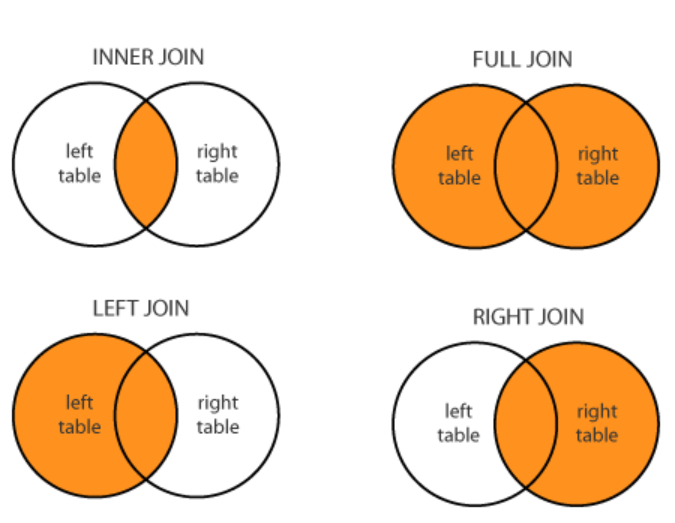

Note: SQLite does not support right and full join. However, they can be easily obtained using LEFT JOIN and UNION commands. Can try it out as an exercise.  

## Preparing the GitHub dataset for regression analysis

_Example_ Let's now turn to the preparation of the GitHub dataset for the analysis. 

It is possible to prepare the dataset by writing one long query, but for this lecture it is better to go step by step using views and temporary tables. As an exercise, you can try to combine the queries together. 

    Owners: Owner id, Project id (projects) -- Country code (users on owner id) -- Commits (commits on project id)
    Users: User id, Country code -- Commits (commits on user_id) 
    Sum by country code of users and country code of owners

In [ ]:
#First, create a view joining projects and users, to obtain the country_code of project owners. 

#For convenience I assign shorter names to identify tables: p for projects u for users (you can assign ofc any name you want). 
#It is useful/necessary when merging these two tables, because they have the same column labels, which mean different things.
#Ex: id - is a user id in users and id - is a project id in projects. Therefore, to avoid confusion we need to be 
#more specific when we specify which columns we select: projects.id, users.id or p.id, u.id 

script = '''
CREATE VIEW view_projects
AS
SELECT p.id AS project_id, owner_id, u.country_code AS owner_country
FROM projects p
INNER JOIN users u
ON p.owner_id = u.id
'''
cur.execute(script)

In [170]:
# checking our view 
# note that two queries are run here: 1) view_projects; 2) outer SELECT ... LIMIT
script='''
SELECT * FROM view_projects
LIMIT 10
'''
view_query(script)

,project_id,owner_id,owner_country
0,19,78,us
1,92,877,ca
2,105,963,nl
3,168,142,us
4,320,2100,it
5,334,2163,se
6,431,3816,us
7,448,3877,us
8,471,3969,il
9,564,4291,fr


Second, we will join the table _commits_ and the result of the query _view_projects_ on project_id. As we are interested in collaborations, you can already drop self-commits, i.e. where committer_id and project's owner_id are the same. Group the data by committer_id and country_code of the project owner. Save the result in a temporary table. 

<div class="alert alert-block alert-info">
<b>Question :</b> Why do you think I prefer here a temporary table and not a view? 
Why do I already prefer to aggregate the data in this step? 
</div>


In [171]:
# Execution takes some time 
# Note: this table disappers once you close the connection to the database, so you will need to re-run it again
script = '''
CREATE TEMPORARY TABLE projects_commits
AS
SELECT commiter_id, owner_country, SUM(num_commits) AS number_commits
FROM commits c
INNER JOIN view_projects p
ON c.project_id = p.project_id
WHERE c.commiter_id <> p.owner_id 
GROUP BY commiter_id, owner_country
'''
cur.execute(script)

In [78]:
# Checking whether the query made sense
script='''
SELECT * FROM projects_commits
LIMIT 10
'''
view_query(script)

,commiter_id,owner_country,number_commits
0,6,ar,6
1,6,at,8
2,6,au,102
3,6,bd,1
4,6,br,54
5,6,by,3
6,6,ca,187
7,6,ch,2
8,6,cn,311
9,6,co,5


Finally, let's merge view_projects_commits to users table to find out the country code of commiter. Again, aggregate the dataset on commiter_country and owner_country. We are almost there. 

In [173]:
script = '''
CREATE TEMPORARY TABLE u_p_c
AS
SELECT u.country_code AS commiter_country, owner_country, SUM(number_commits) AS number_commits
FROM projects_commits pc
INNER JOIN users u
ON pc.commiter_id = u.id
GROUP BY commiter_country, owner_country
'''
cur.execute(script)

In [174]:
script='''
SELECT * FROM u_p_c
'''
view_query(script)
github = view_query(script)
github.head()

,commiter_country,owner_country,number_commits
0,ae,de,4
1,ae,fr,59
2,ae,in,1
3,ae,ir,22
4,ae,sg,1


<div class="alert alert-block alert-info">
<b>Question :</b> 
Now we only need to create a column to denote non-directional country pairs (de-us = us-de). You can either do it in pandas, but can also practice the CASE command with SQLite. 
    
_Hint_ You can also compare strings using < or >; || is used to concatenate strings in SQLite.
</div>
    

In [175]:
#Your solution 
#Here I use CASE to create a new column pair_label: it should take the same value (e.g. deus) for same country pairs (Germany-US and US-Germany)
#This is just one way to do it, maybe another solution seems more natural to you, but I wanted to give an example with CASE :) 

script = '''
SELECT commiter_country, owner_country,
       CASE
            WHEN commiter_country<owner_country THEN commiter_country || owner_country
            ELSE
                owner_country || commiter_country
        END pair_label,
        number_commits
FROM u_p_c
ORDER BY number_commits DESC'''

# I store the result of the query in my final dataset
github = view_query(script)
github.head() #the github dataset is ready for the analysis! 

,commiter_country,owner_country,pair_label,number_commits
0,us,us,usus,20180
1,de,de,dede,4661
2,fr,fr,frfr,2417
3,de,us,deus,2296
4,in,in,inin,2190


Now, run the query to select the necessary columns from the 'u_p_c' table and save the result to a Dataframe. 
Your final dataset should have the following columns: commiter_country, owner_country, non-directional pair label (or pair id), number of commits. 

The head of your dataset should like that 
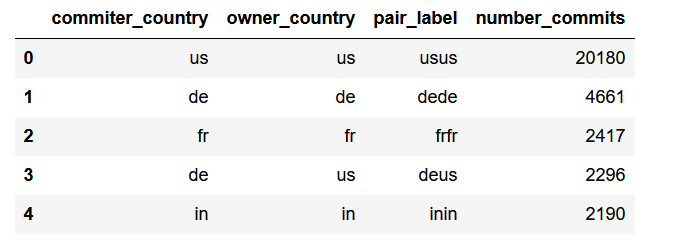

The github dataset is ready for the analysis! For further analysis, I saved the data in a dataframe 'github'. 

In [63]:
conn.close() #you can close the connection with the database; note that the temporary tables will be lost; 
# you can also do this step later if you plan to access the data/temp tables further

# we are done with SQL and now going to work with Pandas and Statsmodels

## Merging GitHub and CEPII datasets, running the regression

Preparing CEPII data 

In [190]:
# we import the cepii csv file directly in the memory as a dataframe using pandas read_csv function. 

cepii = pd.read_csv("gravdata.csv")
cepii.head()

,iso2_o,iso2_d,contig,distw,pop_o,pop_d,gdp_o,gdp_d,tdiff,eu_o,eu_d,comlang
0,AD,AD,0,11.227382,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
1,AE,AD,0,5239.465258,9.156963,NaN,3.702963e+11,NaN,3.0,0.0,0.0,0
2,AF,AD,0,5712.403090,32.526562,NaN,1.933129e+10,NaN,3.5,0.0,0.0,0
3,AG,AD,0,6574.278311,0.091818,NaN,1.259259e+09,NaN,5.0,0.0,0.0,0
4,AI,AD,0,6593.264971,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0


In [191]:
# basic summary statistics
cepii.describe()

,contig,distw,pop_o,pop_d,gdp_o,gdp_d,tdiff,eu_o,eu_d,comlang
count,50176.000000,50176.000000,44576.000000,44576.000000,4.278400e+04,4.278400e+04,50176.000000,49952.000000,49952.000000,50176.000000
mean,0.012277,8484.354990,36.786091,36.786091,3.865319e+11,3.865319e+11,5.018841,0.125000,0.125000,0.201849
std,0.110120,4694.366258,138.605756,138.605756,1.599477e+12,1.599477e+12,3.497312,0.330722,0.330722,0.401384
min,0.000000,0.995137,0.009916,0.009916,3.267328e+07,3.267328e+07,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4765.499750,1.360088,1.360088,6.699204e+09,6.699204e+09,2.000000,0.000000,0.000000,0.000000
50%,0.000000,8095.464147,7.305700,7.305700,3.299769e+10,3.299769e+10,5.000000,0.000000,0.000000,0.000000
75%,0.000000,11993.445567,25.155317,25.155317,1.948513e+11,1.948513e+11,8.000000,0.000000,0.000000,0.000000
max,1.000000,19888.656250,1371.219971,1371.219971,1.803665e+13,1.803665e+13,12.000000,1.000000,1.000000,1.000000


Some useful commands with dataframes

In [192]:
# display column names 
cepii.columns

Index(['iso2_o', 'iso2_d', 'contig', 'distw', 'pop_o', 'pop_d', 'gdp_o',
       'gdp_d', 'tdiff', 'eu_o', 'eu_d', 'comlang'],
      dtype='object')

In [205]:
# references to columns
cepii.tdiff

0        0.0
1        3.0
2        3.5
3        5.0
4        5.0
        ... 
50171    1.0
50172    0.0
50173    0.0
50174    0.5
50175    0.0
Name: tdiff, Length: 50176, dtype: float64

In [206]:
# references to columns alternative
cepii['tdiff']

0        0.0
1        3.0
2        3.5
3        5.0
4        5.0
        ... 
50171    1.0
50172    0.0
50173    0.0
50174    0.5
50175    0.0
Name: tdiff, Length: 50176, dtype: float64

In [207]:
# references to columns alternative
cepii.iloc[:, 8]

0        0.0
1        3.0
2        3.5
3        5.0
4        5.0
        ... 
50171    1.0
50172    0.0
50173    0.0
50174    0.5
50175    0.0
Name: tdiff, Length: 50176, dtype: float64

In [198]:
# select certain columns of the dataframe 
cepii[['pop_o', 'pop_d', 'iso2_d']]

,pop_o,pop_d,iso2_d
0,NaN,NaN,AD
1,9.156963,NaN,AD
2,32.526562,NaN,AD
3,0.091818,NaN,AD
4,NaN,NaN,AD
...,...,...,...
50171,NaN,15.602751,ZW
50172,54.956921,15.602751,ZW
50173,16.211767,15.602751,ZW
50174,77.266815,15.602751,ZW


In [199]:
# select certain columns from the dataframe (alternative)
cepii.iloc[:,[4, 5, 1]]

,pop_o,pop_d,iso2_d
0,NaN,NaN,AD
1,9.156963,NaN,AD
2,32.526562,NaN,AD
3,0.091818,NaN,AD
4,NaN,NaN,AD
...,...,...,...
50171,NaN,15.602751,ZW
50172,54.956921,15.602751,ZW
50173,16.211767,15.602751,ZW
50174,77.266815,15.602751,ZW


In [202]:
# select rows and columns from the dataframe 
cepii.iloc[40:48, range(1,5)]

,iso2_d,contig,distw,pop_o
40,AD,0,4199.047884,23.344179
41,AD,0,9136.144332,1371.219971
42,AD,0,8458.033802,48.228703
43,AD,0,8914.802203,4.807850
44,AD,0,7690.846087,11.389562
45,AD,0,3849.207090,0.520502
46,AD,0,11961.505859,NaN
47,AD,0,2863.465376,1.165300


In [204]:
# select rows from the dataframe that fit certain critera
cepii.loc[cepii.iso2_d == 'DE']

,iso2_o,iso2_d,contig,distw,pop_o,pop_d,gdp_o,gdp_d,tdiff,eu_o,eu_d,comlang
10976,AD,DE,0,1182.827191,NaN,81.413147,NaN,3.363447e+12,0.0,0.0,1.0,0
10977,AE,DE,0,4823.589034,9.156963,81.413147,3.702963e+11,3.363447e+12,3.0,0.0,1.0,0
10978,AF,DE,0,4945.520213,32.526562,81.413147,1.933129e+10,3.363447e+12,3.5,0.0,1.0,0
10979,AG,DE,0,7277.712379,0.091818,81.413147,1.259259e+09,3.363447e+12,5.0,0.0,1.0,0
10980,AI,DE,0,7267.051693,NaN,81.413147,NaN,3.363447e+12,5.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11195,YU,DE,0,1159.348851,NaN,81.413147,NaN,3.363447e+12,0.0,0.0,1.0,0
11196,ZA,DE,0,9110.947225,54.956921,81.413147,3.145719e+11,3.363447e+12,1.0,0.0,1.0,0
11197,ZM,DE,0,7516.817409,16.211767,81.413147,2.115439e+10,3.363447e+12,1.0,0.0,1.0,0
11198,ZR,DE,0,6392.761326,77.266815,81.413147,3.523774e+10,3.363447e+12,0.5,0.0,1.0,0


In [208]:
# rename iso2_o and iso2_d to avoid confusion (unlike stata, it is not necessary to have the same column names for merging)
cepii = cepii.rename(columns={"iso2_d" : "owner_country", "iso2_o": "commiter_country"})

#change subscripts _o and _c in column names
cepii.columns = [x.replace("_o", "_commiter").replace("_d", "_owner") for x in cepii.columns]
cepii.head()

,commiter_country,owner_country,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
0,AD,AD,0,11.227382,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
1,AE,AD,0,5239.465258,9.156963,NaN,3.702963e+11,NaN,3.0,0.0,0.0,0
2,AF,AD,0,5712.403090,32.526562,NaN,1.933129e+10,NaN,3.5,0.0,0.0,0
3,AG,AD,0,6574.278311,0.091818,NaN,1.259259e+09,NaN,5.0,0.0,0.0,0
4,AI,AD,0,6593.264971,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0


In [209]:
#make country codes lower case
for x in ["commiter_country", "owner_country"]:
    cepii[x] = cepii[x].str.lower() #we take a column cepii['commiter_country'] and apply a string function str.lower() 

In [210]:
cepii.head()

,commiter_country,owner_country,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
0,ad,ad,0,11.227382,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
1,ae,ad,0,5239.465258,9.156963,NaN,3.702963e+11,NaN,3.0,0.0,0.0,0
2,af,ad,0,5712.403090,32.526562,NaN,1.933129e+10,NaN,3.5,0.0,0.0,0
3,ag,ad,0,6574.278311,0.091818,NaN,1.259259e+09,NaN,5.0,0.0,0.0,0
4,ai,ad,0,6593.264971,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0


In [211]:
#merge with github data from our SQL exercise
#note: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
#inner merge is also default in pandas (if you don't change the default, not needed to specify this parameter)

merged = pd.merge(github, cepii, on = ['commiter_country', 'owner_country'], how = 'inner')
merged.head()

,commiter_country,owner_country,pair_label,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
0,us,us,usus,20180,0,1853.802467,321.418823,321.418823,1.803665e+13,1.803665e+13,0.0,NaN,NaN,0
1,de,de,dede,4661,0,301.082594,81.413147,81.413147,3.363447e+12,3.363447e+12,0.0,NaN,NaN,0
2,fr,fr,frfr,2417,0,408.960309,66.808388,66.808388,2.418835e+12,2.418835e+12,0.0,NaN,NaN,0
3,de,us,deus,2296,0,7595.451783,81.413147,321.418823,3.363447e+12,1.803665e+13,8.5,1.0,0.0,0
4,in,in,inin,2190,0,868.567365,1311.050537,1311.050537,2.095398e+12,2.095398e+12,0.0,NaN,NaN,0


In [212]:
# drop internal commits 
# the original CEPII coding of common language/borders is tricky for same-country pairs (common language = 0 for same country collaborations)

#we first note the rows where commiter_country == owner_country and store them in indexN
indexN = merged[(merged['commiter_country'] == merged['owner_country'])].index

#we now drop these rows from the table merge
merged.drop(indexN, inplace = True)

merged.describe()

,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
count,1330.000000,1330.000000,1330.000000,1328.000000,1329.000000,1.327000e+03,1.327000e+03,1330.000000,1330.000000,1330.000000,1330.000000
mean,31.057895,0.063910,6621.174859,138.082998,150.874591,2.226274e+12,2.233392e+12,4.472932,0.441353,0.390226,0.160902
std,123.362894,0.244684,4689.580201,307.962824,325.060740,4.293894e+12,4.280254e+12,3.514354,0.496735,0.487984,0.367579
min,1.000000,0.000000,160.928323,0.055070,0.031781,9.840740e+08,9.840740e+08,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2070.159416,9.844686,9.798871,2.407964e+11,2.837032e+11,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,6742.521546,37.999493,37.999493,5.831686e+11,6.707899e+11,4.500000,0.000000,0.000000,0.000000
75%,16.000000,0.000000,9621.807457,81.413147,100.699394,2.095398e+12,2.095398e+12,7.350000,1.000000,1.000000,0.000000
max,2296.000000,1.000000,19539.478216,1371.219971,1371.219971,1.803665e+13,1.803665e+13,12.000000,1.000000,1.000000,1.000000


In [213]:
# alternative solution to drop these rows 
# we re-create merged table 
merged = pd.merge(github, cepii, on = ['commiter_country', 'owner_country'], how = 'inner')

# we create a sub-table where commiter_country != owner_country and save it under the same name
merged = merged.loc[merged['commiter_country'] != merged['owner_country']]
merged.describe()

,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
count,1330.000000,1330.000000,1330.000000,1328.000000,1329.000000,1.327000e+03,1.327000e+03,1330.000000,1330.000000,1330.000000,1330.000000
mean,31.057895,0.063910,6621.174859,138.082998,150.874591,2.226274e+12,2.233392e+12,4.472932,0.441353,0.390226,0.160902
std,123.362894,0.244684,4689.580201,307.962824,325.060740,4.293894e+12,4.280254e+12,3.514354,0.496735,0.487984,0.367579
min,1.000000,0.000000,160.928323,0.055070,0.031781,9.840740e+08,9.840740e+08,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2070.159416,9.844686,9.798871,2.407964e+11,2.837032e+11,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,6742.521546,37.999493,37.999493,5.831686e+11,6.707899e+11,4.500000,0.000000,0.000000,0.000000
75%,16.000000,0.000000,9621.807457,81.413147,100.699394,2.095398e+12,2.095398e+12,7.350000,1.000000,1.000000,0.000000
max,2296.000000,1.000000,19539.478216,1371.219971,1371.219971,1.803665e+13,1.803665e+13,12.000000,1.000000,1.000000,1.000000


We are now ready to run the gravity model on the merged dataset. You can use statsmodels.api (https://www.statsmodels.org/stable/index.html), linear model from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) or any other software (Stata, R) you are familiar with. 

<div class="alert alert-block alert-info">
<b>In teams:</b> 
    
   1) Which independent variables would you use? 
    
   2) Would you do any transformations of the variables (e.g. taking logs, inverse hyperbolic sine, ...). If yes, explain which variables you transform and why? 
   
   3) When you run a simple OLS, which coefficient for distance do you get? Write the number in chat, round to the 3rd digit after the comma.   
   
   4) Is there smth wrong with the dataset we have? How does it influence our results? Hint: do we have all possible country pairs? 
    
   5) Why is OLS with log-transformed variables not the best approach in this setting? What could be a better approach given the nature (count data, many zeros once we add all possible country pairs) of our data? 
    
</div>

In [214]:
# create a copy to play, just in case 
merged_T = merged.copy()
merged_T.head()

,commiter_country,owner_country,pair_label,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
3,de,us,deus,2296,0,7595.451783,81.413147,321.418823,3.363447e+12,1.803665e+13,8.500000,1.0,0.0,0
7,us,de,deus,1568,0,7595.451770,321.418823,81.413147,1.803665e+13,3.363447e+12,8.500000,0.0,1.0,0
10,fr,us,frus,1372,0,7456.767207,66.808388,321.418823,2.418835e+12,1.803665e+13,8.500000,1.0,0.0,0
12,ca,us,caus,1110,1,2079.296721,35.851772,321.418823,1.550537e+12,1.803665e+13,2.083334,0.0,0.0,1
15,es,us,esus,1035,0,7437.156982,46.418270,321.418823,1.199057e+12,1.803665e+13,8.000000,1.0,0.0,1


In [216]:
merged_T.describe()

,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
count,1330.000000,1330.000000,1330.000000,1328.000000,1329.000000,1.327000e+03,1.327000e+03,1330.000000,1330.000000,1330.000000,1330.000000
mean,31.057895,0.063910,6621.174859,138.082998,150.874591,2.226274e+12,2.233392e+12,4.472932,0.441353,0.390226,0.160902
std,123.362894,0.244684,4689.580201,307.962824,325.060740,4.293894e+12,4.280254e+12,3.514354,0.496735,0.487984,0.367579
min,1.000000,0.000000,160.928323,0.055070,0.031781,9.840740e+08,9.840740e+08,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2070.159416,9.844686,9.798871,2.407964e+11,2.837032e+11,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,6742.521546,37.999493,37.999493,5.831686e+11,6.707899e+11,4.500000,0.000000,0.000000,0.000000
75%,16.000000,0.000000,9621.807457,81.413147,100.699394,2.095398e+12,2.095398e+12,7.350000,1.000000,1.000000,0.000000
max,2296.000000,1.000000,19539.478216,1371.219971,1371.219971,1.803665e+13,1.803665e+13,12.000000,1.000000,1.000000,1.000000


_Hint_ 

* log the variables (one possible way)
        for x in [list of the relevant column indices]:
            merged_T.iloc[:, x] = np.log(merged_T.iloc[:,x]+1)
* np.arcsinh() works in a similar way

In [221]:
# one way to specify columns that we want to log transform 
merged_T[['number_commits', 'distw', 'pop_commiter', 'pop_owner', 'gdp_commiter', 'gdp_owner']]

# you could also use references with iloc as we need in class
#merged_T.iloc[:,[3]+list(range(5,10))]

,number_commits,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner
3,2296,7595.451783,81.413147,321.418823,3.363447e+12,1.803665e+13
7,1568,7595.451770,321.418823,81.413147,1.803665e+13,3.363447e+12
10,1372,7456.767207,66.808388,321.418823,2.418835e+12,1.803665e+13
12,1110,2079.296721,35.851772,321.418823,1.550537e+12,1.803665e+13
15,1035,7437.156982,46.418270,321.418823,1.199057e+12,1.803665e+13
...,...,...,...,...,...,...
1420,1,10968.432963,54.956921,7.305700,3.145719e+11,3.092345e+11
1421,1,8934.843895,54.956921,257.563812,3.145719e+11,8.619340e+11
1422,1,7857.113008,54.956921,1311.050537,3.145719e+11,2.095398e+12
1423,1,8305.944601,54.956921,19.832390,3.145719e+11,1.779545e+11


In [222]:
# do the necessary transformation 
for x in ['number_commits', 'distw', 'pop_commiter', 'pop_owner', 'gdp_commiter', 'gdp_owner']:
      merged_T[x] = np.log(merged_T[x]+1) 
        # we add 1 to avoid turning zero-values to missing. Note that it is not the best solution !
        # somewhat better alternative in the presence of zeros: inverse hyperbolic sine transformation, which is well-defined at zero.

# check the result
merged_T.describe()

,number_commits,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
count,1330.000000,1330.000000,1330.000000,1328.000000,1329.000000,1327.000000,1327.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,2.042503,0.063910,8.423022,3.651185,3.713857,27.245619,27.258337,4.472932,0.441353,0.390226,0.160902
std,1.373532,0.244684,0.994039,1.517556,1.560220,1.595874,1.585439,3.514354,0.496735,0.487984,0.367579
min,0.693147,0.000000,5.087154,0.053607,0.031286,20.707212,20.707212,0.000000,0.000000,0.000000,0.000000
25%,1.098612,0.000000,7.635861,2.383675,2.379442,26.207218,26.371195,1.000000,0.000000,0.000000,0.000000
50%,1.609438,0.000000,8.816338,3.663549,3.663549,27.091742,27.231722,4.500000,0.000000,0.000000,0.000000
75%,2.833213,0.000000,9.171891,4.411745,4.622021,28.370765,28.370765,7.350000,1.000000,1.000000,0.000000
max,7.739359,1.000000,9.880243,7.224185,7.224185,30.523427,30.523427,12.000000,1.000000,1.000000,1.000000


In [223]:
# import statsmodels package https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm 

In [225]:
# our independent variables
merged_T.iloc[:, 4:]

,contig,distw,pop_commiter,pop_owner,gdp_commiter,gdp_owner,tdiff,eu_commiter,eu_owner,comlang
3,0,8.935437,4.411745,5.775851,28.843987,30.523427,8.500000,1.0,0.0,0
7,0,8.935437,5.775851,4.411745,30.523427,28.843987,8.500000,0.0,1.0,0
10,0,8.917011,4.216686,5.775851,28.514307,30.523427,8.500000,1.0,0.0,0
12,1,7.640266,3.606904,5.775851,28.069622,30.523427,2.083334,0.0,0.0,1
15,0,8.914378,3.859008,5.775851,27.812557,30.523427,8.000000,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1420,0,9.302868,4.024582,2.116942,26.474479,26.457366,6.000000,0.0,0.0,1
1421,0,9.097826,4.024582,5.555143,26.474479,27.482445,6.000000,0.0,0.0,0
1422,0,8.969302,4.024582,7.179346,26.474479,28.370765,3.500000,0.0,0.0,1
1423,0,9.024847,4.024582,3.036509,26.474479,25.904794,0.000000,0.0,1.0,0


In [226]:
# set X and Y
X = merged_T.iloc[:, 4:] #columns of merged_T corresponding to independent variables 
y = merged_T['number_commits']
X = sm.add_constant(X)

# do the estimation 
est = sm.OLS(y, X, missing='drop').fit()
est.summary() 
# can also use est.params, est.tvalues, est.pvalues ... will return vectors with coefficients and corresponding statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         number_commits   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     45.91
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           1.15e-78
Time:                        16:21:14   Log-Likelihood:                -2100.0
No. Observations:                1324   AIC:                             4222.
Df Residuals:                    1313   BIC:                             4279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.6979      1.387    -11.314      0.000     -18.420     -12.976
contig           0.0790      0.156      0.507      0.612      -0.227       0.385
distw           -0.2677      0.072     -3.743      0.000      -0.408      -0.127
pop_commiter    -0.0846      0.036     -2.361      0.018      -0.155      -0.014
pop_owner       -0.0320      0.035     -0.921      0.357      -0.100       0.036
gdp_commiter     0.3974      0.033     12.057      0.000       0.333       0.462
gdp_owner        0.3347      0.033     10.222      0.000       0.270       0.399
tdiff            0.0608      0.017      3.505      0.000       0.027       0.095
eu_commiter      0.3105      0.081      3.816      0.000       0.151       0.470
eu_owner         0.0694      0.084      0.823      0.411      -0.096       0.235
comlang          0.2065      0.096      2.151      0.032       0.018       0.395
==============================================================================
Omnibus:                       87.376   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.812
Skew:                           0.682   Prob(JB):                     2.87e-23
Kurtosis:                       3.139   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Limitations**

* Reprensentativeness: locations are self-reported; only about 10% of Github users report their locations
* We work with count data (number of commits) - poisson models might fit better than ols
* We only focused on the intensive margin (we only have country-pairs with non-zero commits)
* Ideally: we would have all possible country pairs and would replace number of commits with zero if it is missing
    * Then, ols and log transformation would become more problematic, as we will have many zeros 
    * Wide-spread solution from trade literature Pseudo Poisson Maximum Likelihood (https://www.statsmodels.org/stable/generated/statsmodels.miscmodels.count.PoissonZiGMLE.html) 
    
* We only have cross-sectional data for October; we could further extend this analysis by adding the time dimension

# 5. NoSQL and Not only SQL

Relatively recent developments: 'NoSQL / Not Only SQL' databases (e.g. MongoDB)
* From 2009, big-data movement (emergence of Google, Amazon, eBay, clustered computing): large volumes of unstructured data
* Designed to solve the problems of data processing in volume, multi-sources and multi-formats
* Main differences to SQL
    * No predefined schema 
    * Based on key-value pairs rather than table-based
    * Horizontal rather than vertical scalability
* Types: column-oriented, document-oriented, graph-oriented and key / value-oriented data.
* Usage still behind the 'standard' relational databases https://db-engines.com/en/ranking 
* References
    * https://towardsdatascience.com/its-time-to-familiarize-yourself-with-nosql-databases-more-than-ever-5fb1f65c22b1
    * https://www.coursera.org/learn/nosql-databases?ranMID=40328&ranEAID=vedj0cWlu2Y&ranSiteID=vedj0cWlu2Y-DHHjdVvR8bfQdeOnPQg.nQ&siteID=vedj0cWlu2Y-DHHjdVvR8bfQdeOnPQg.nQ&utm_content=10&utm_medium=partners&utm_source=linkshare&utm_campaign=vedj0cWlu2Y 

# 6. Problem Set

<div class="alert alert-block alert-info">
<b>Problem Set. </b> 
    
You can use SQL_Problem_Set Notebook as a template to work on your solutions. 
  
1. Reestimate the model at the city level (for this you would need to go back to the SQL). Which additional insights can you learn? For this exercise: it is fine to focus on the intensive margin (only consider city pairs with non-zero collaborations).
    
_Hint_: https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b
    
2. Are there non-linearities in the distance penalty? How can this be checked? 
    
3. Which alternative specifications would you try? 
    
    
I encourage you to work on the problem set in teams. In the end, please, submit your responses to the form below (one form per team is enough) by <b>Monday, October 25. </b> 
    
If you tried to solve a question, but could not manage, please, write 'Can't solve (you can also specify a problem)'. The responses are anonymous and non-mandatory, but your feedback is extremely helpful :)  I will spend the first 15 minutes of our class on October 26 to go through the problem set and your questions. Solutions will be available after that. 
   

</div>

**Form to submit answers to the Problem Set** 
*  https://forms.gle/6hTyYSuncACgwzar9

## Resources

https://www.sqlitetutorial.net/

https://towardsdatascience.com/top-sql-queries-for-interview-b563cfec66d0

https://blog.sqlauthority.com/category/sql-puzzle/

https://sqlzoo.net/ 

https://www.datacamp.com/community/tutorials/sql-tutorial-query

https://mode.com/blog/learning-python-sql/ 

Markdown cheat sheet for Jupyter Notebook https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed